# Part 1: The Bisection Method

### Core Concept
The Bisection Method is a root-finding algorithm that repeatedly bisects (divides in half) an interval and then selects the subinterval in which a root must lie for further processing. It is a very simple and robust method, but it is also relatively slow.

### The Algorithm
The method is based on the **Intermediate Value Theorem**, which states that if a continuous function $f(x)$ has values $f(a)$ and $f(b)$ with opposite signs on an interval `[a, b]`, then there must be at least one root in `(a, b)`.

\

The iterative process is as follows:

1.  **Initialization:** Choose a starting interval `[a, b]` such that $f(a) \cdot f(b) < 0$. This guarantees a root is "bracketed" between them.


2.  **Iteration Step:**
    a. Calculate the midpoint of the interval: $m = (a + b) / 2$.\
    b. Evaluate the function at the midpoint, $f(m)$.\
    c. **Update the interval:**
\
|>           If $f(a) \cdot f(m) < 0$, the root lies in the left subinterval. The new interval becomes `[a, m]`.\
|>           If $f(b) \cdot f(m) < 0$, the root lies in the right subinterval. The new interval becomes `[m, b]`.\
|>           If $f(m) = 0$ (or is very close to zero), `m` is the root, and the process stops.

\
3.  **Termination Condition:**
    The process is repeated until the interval is sufficiently small. A common stopping criterion is the **relative error** between two successive midpoints, $m_k$ and $m_{k+1}$:
    $$ \frac{|m_{k+1} - m_k|}{|m_{k+1}|} \le \epsilon $$\
    where $\epsilon$ (epsilon) is a predefined small tolerance (e.g., `1e-6`). This ensures the approximation of the root is no longer changing significantly.

f(a) = f(-0.5) = 0.6250
f(b) = f(1.3) = -1.0308
f(a) * f(b) = -0.6443

Initial interval is valid. A root is bracketed.
--------------------------------------------------

--- Iteration History ---
           a         b         m          f(m)
0  -0.500000  1.300000  0.400000  1.186240e+00
1   0.400000  1.300000  0.850000 -1.389529e+00
2   0.400000  0.850000  0.625000 -4.269409e-02
3   0.400000  0.625000  0.512500  6.189171e-01
4   0.512500  0.625000  0.568750  2.966661e-01
5   0.568750  0.625000  0.596875  1.286523e-01
6   0.596875  0.625000  0.610938  4.333223e-02
7   0.610938  0.625000  0.617969  3.991260e-04
8   0.617969  0.625000  0.621484 -2.112851e-02
9   0.617969  0.621484  0.619727 -1.035982e-02
10  0.617969  0.619727  0.618848 -4.979112e-03
11  0.617969  0.618848  0.618408 -2.289682e-03
12  0.617969  0.618408  0.618188 -9.452003e-04
13  0.617969  0.618188  0.618079 -2.730176e-04
14  0.617969  0.618079  0.618024  6.305907e-05
15  0.618024  0.618079  0.618051 -1.049781e-04
16  

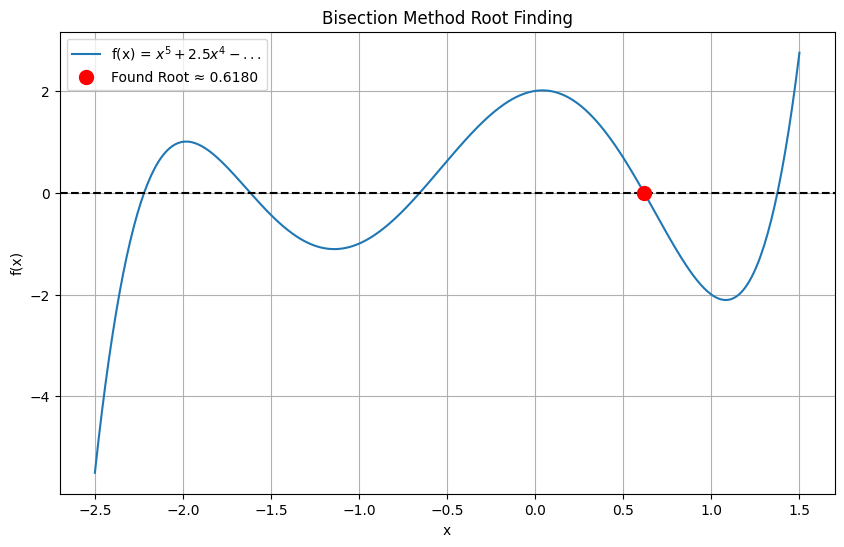

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

#---------------------------------------------------------------------
# Step 1: Setup - Define the function, interval, and tolerance
#---------------------------------------------------------------------

# The polynomial f(x) from the lab file.
# Coefficients are [c0, c1, c2, c3, c4, c5]
f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])

# The initial interval [a, b]
a = -0.5
b = 1.3

# The tolerance for the stopping condition
epsilon = 1e-6

# --- Verification of the initial interval ---
print(f"f(a) = f({a}) = {f(a):.4f}")
print(f"f(b) = f({b}) = {f(b):.4f}")
print(f"f(a) * f(b) = {f(a)*f(b):.4f}")
if f(a) * f(b) >= 0:
    print("\nError: f(a) and f(b) do not have opposite signs. Bisection method cannot proceed.")
    # In a real application, you would exit or raise an error here.
else:
    print("\nInitial interval is valid. A root is bracketed.")
print("-" * 50)


#---------------------------------------------------------------------
# Step 2: Iteration - Implement the Bisection Algorithm
#---------------------------------------------------------------------

# Initialize variables for the loop
m_old = (a + b) / 2 # Calculate the first midpoint
root_found = False
iteration_count = 0

# Lists to store the history of our calculations for later display
list_a = []
list_b = []
list_m = []
list_f_m = []


# The main loop. It will continue until the root is found.
while not root_found:
    iteration_count += 1

    # Log the current state before updating
    list_a.append(a)
    list_b.append(b)
    list_m.append(m_old)
    list_f_m.append(f(m_old))

    # The decision logic to shrink the interval
    if f(a) * f(m_old) < 0:
        b = m_old  # Root is in the left half
    else:
        a = m_old  # Root is in the right half

    # Calculate the new midpoint
    m_new = (a + b) / 2

    # Check the termination condition
    relative_error = abs((m_new - m_old) / m_new)

    if relative_error <= epsilon:
        root = m_new
        root_found = True

    # Update m_old for the next iteration
    m_old = m_new

# Log the final state
list_a.append(a)
list_b.append(b)
list_m.append(m_new)
list_f_m.append(f(m_new))


#---------------------------------------------------------------------
# Step 3: Presentation - Display the results
#---------------------------------------------------------------------

# Create a dictionary from our lists
results_dict = {
    'a': list_a,
    'b': list_b,
    'm': list_m,
    'f(m)': list_f_m
}

# Create and display the Pandas DataFrame
results_df = pd.DataFrame(results_dict)

print("\n--- Iteration History ---")
print(results_df.to_string()) # .to_string() ensures all rows are printed

print(f"\n--- Final Result ---")
print(f"Root found after {iteration_count} iterations.")
print(f"The root is approximately: {root:.8f}")
print(f"The value of f(root) is: {f(root):.2e}") # Should be very close to zero

#---------------------------------------------------------------------
# Step 4: Visualization
#---------------------------------------------------------------------
plt.figure(figsize=(10, 6))
x_vals = np.linspace(-2.5, 1.5, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = $x^5 + 2.5x^4 - ...$')
plt.axhline(0, color='black', linestyle='--')
plt.plot(root, f(root), 'ro', markersize=10, label=f'Found Root ≈ {root:.4f}')
plt.title("Bisection Method Root Finding")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## Part 2: Fixed Point Iteration

### Core Concept
The Fixed Point Iteration method finds a root of an equation `f(x) = 0` by first rearranging it into an equivalent form `x = g(x)`. A value `ξ` (xi) that satisfies `g(ξ) = ξ` is called a **fixed point** of the function `g(x)`. If such a fixed point exists, it is also a root of the original function `f(x)`, because:
`f(ξ) = ξ - g(ξ) = ξ - ξ = 0`.

### The Iteration Scheme
The algorithm starts with an initial guess, `x_0`, and generates a sequence of approximations using the recursive formula:
$$ x_{k+1} = g(x_k) $$
If the sequence `x_0, x_1, x_2, ...` converges, it will converge to the fixed point `ξ`.

### Convergence Condition
The success of this method is entirely dependent on the choice of the function `g(x)`. An iterative sequence is guaranteed to converge to a fixed point `ξ` if the initial guess `x_0` is sufficiently close to `ξ` and the absolute value of the derivative of `g(x)` at the fixed point is less than 1:
$$ |g'(\xi)| < 1 $$

**Intuitive Understanding of Convergence:**
*   **If $|g'(x)| < 1$ (Shallow Slope):** The function `g(x)` is less steep than the line `y=x`. Each iteration `x_{k+1} = g(x_k)` will produce a new `x` that is closer to the intersection point (the fixed point) than the previous one. This creates a "cobweb" or "staircase" diagram that spirals inward towards the solution. This is **convergent**.
*   **If $|g'(x)| > 1$ (Steep Slope):** The function `g(x)` is steeper than the line `y=x`. Each iteration will produce a new `x` that is further away from the intersection point. This creates a diagram that spirals outward, away from the solution. This is **divergent**.

A single function `f(x)` can be rearranged into many different forms of `g(x)`, and their convergence properties can vary dramatically.

--- Iteration History for Different g(x) Functions ---
    g1(x) sequence  g2(x) sequence  g3(x) sequence
0         0.800000        0.800000        0.800000
1         1.512320        0.721997        0.912898
2        -2.347605        0.688573        1.044444
3         0.562201        0.677301        1.160638
4        -0.054108        0.673860        1.241682
5        -1.982772        0.672844        1.288278
6        -1.995936        0.672547        1.311548
7        -1.999770        0.672460        1.322205
8        -1.999999        0.672435        1.326870
9        -2.000000        0.672427        1.328868
10       -2.000000        0.672425        1.329716
11       -2.000000        0.672425        1.330075
12       -2.000000        0.672424        1.330226
13       -2.000000        0.672424        1.330290
14       -2.000000        0.672424        1.330317
15       -2.000000        0.672424        1.330328
16       -2.000000        0.672424        1.330333
17       -2.000000        0

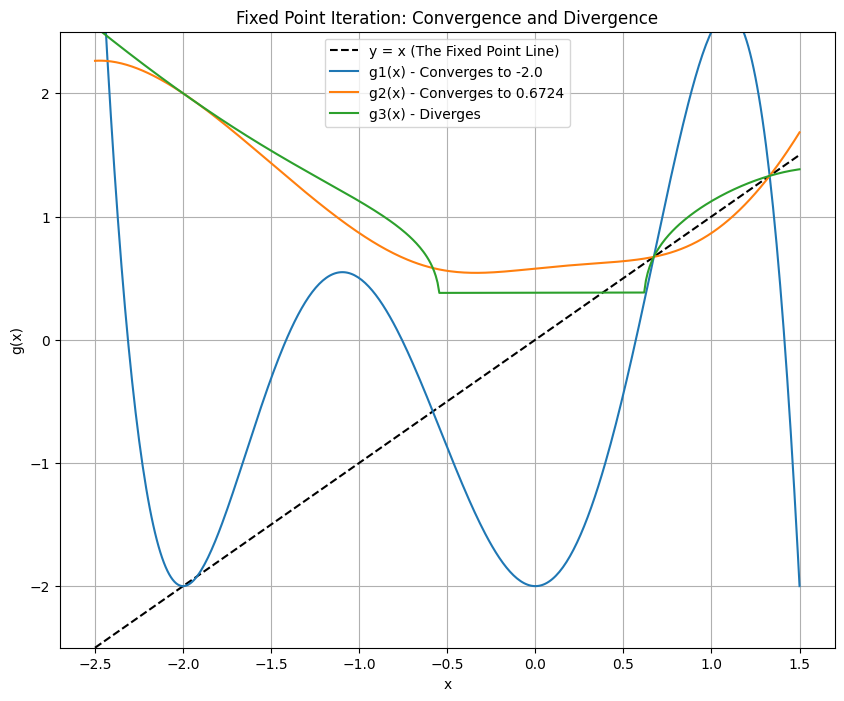

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

#---------------------------------------------------------------------
# Step 1: Setup - Define the functions and initial conditions
#---------------------------------------------------------------------

# The original polynomial f(x)
f = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])

# --- Define the three different g(x) functions ---

# g1(x) can be a Polynomial object
g1 = Polynomial([-2.0, 0.0, 6.0, 2.0, -2.5, -1.0])

# g2(x) involves a square root, so we define it as a standard function
def g2(x):
    # This is the polynomial inside the square root
    p_inside = Polynomial([2.0, 1.0, 0.0, -2.0, 2.5, 1.0])
    return np.sqrt(p_inside(x) / 6.0)

# g3(x) involves a fourth root
def g3(x):
    # This is the polynomial inside the fourth root
    p_inside = Polynomial([-2.0, -1.0, 6.0, 2.0, 0.0, -1.0])
    # Use np.power(..., 1/4) for the fourth root.
    # We add a warning filter to ignore potential issues with negative inputs.
    with np.errstate(invalid='ignore'):
        return np.power(p_inside(x) / 2.5, 1.0/4.0)

# --- Initial conditions ---
# Initial guess for each iteration
a1_initial = 0.80
a2_initial = 0.80
a3_initial = 0.80

# Number of iterations to perform
num_iterations = 20

# Lists to store the sequence of approximations for each g(x)
g1_sequence = []
g2_sequence = []
g3_sequence = []

#---------------------------------------------------------------------
# Step 2: Iteration - Run the fixed-point scheme for each g(x)
#---------------------------------------------------------------------

# Initialize the starting points for the loop
a1 = a1_initial
a2 = a2_initial
a3 = a3_initial

for i in range(num_iterations):
    # Store the current values
    g1_sequence.append(a1)
    g2_sequence.append(a2)
    g3_sequence.append(a3)

    # Calculate the next values in the sequence
    a1 = g1(a1)
    a2 = g2(a2)
    a3 = g3(a3)

#---------------------------------------------------------------------
# Step 3: Presentation - Display the results in a table
#---------------------------------------------------------------------

# Create a dictionary from our lists
results_dict = {
    'g1(x) sequence': g1_sequence,
    'g2(x) sequence': g2_sequence,
    'g3(x) sequence': g3_sequence
}

# Create and display the Pandas DataFrame
results_df = pd.DataFrame(results_dict)

print("--- Iteration History for Different g(x) Functions ---")
print(results_df.to_string())

print("\n--- Analysis ---")
print(f"g1 converges to the root at x = {g1_sequence[-1]:.4f}")
print(f"g2 converges to the root at x = {g2_sequence[-1]:.4f}")
print(f"g3 diverges (last value was {g3_sequence[-1]:.4f})")


#---------------------------------------------------------------------
# Step 4: Visualization
#---------------------------------------------------------------------
plt.figure(figsize=(10, 8))
x_vals = np.linspace(-2.5, 1.5, 400)

# Plot y=x, the line of fixed points
plt.plot(x_vals, x_vals, 'k--', label='y = x (The Fixed Point Line)')

# Plot g1(x)
plt.plot(x_vals, g1(x_vals), label="g1(x) - Converges to -2.0")

# Plot g2(x)
plt.plot(x_vals, g2(x_vals), label="g2(x) - Converges to 0.6724")

# Plot g3(x) (only where it's a real number)
real_g3 = g3(x_vals)
plt.plot(x_vals[~np.isnan(real_g3)], real_g3[~np.isnan(real_g3)], label="g3(x) - Diverges")

plt.title("Fixed Point Iteration: Convergence and Divergence")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.ylim(-2.5, 2.5) # Zoom in to see the intersections clearly
plt.legend()
plt.grid(True)
plt.show()